Matt Lee
ICPE 643 HW Bonus Problem #1

A Quick Analysis of ERCOT Aggregated Ancillary REGUP data from 06/30/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read ERCOT datafile
df = pd.read_csv('2d_Agg_AS_Offers_REGUP.csv')
df

,Delivery Date,Hour Ending,MW Offered,REGUP Offer Price
0,06/30/2025,1,55.0,0.00
1,06/30/2025,1,83.4,0.30
2,06/30/2025,1,91.5,0.35
3,06/30/2025,1,121.5,0.39
4,06/30/2025,1,124.3,0.40
...,...,...,...,...
4528,06/30/2025,24,3756.7,2500.00
4529,06/30/2025,24,3786.7,3000.00
4530,06/30/2025,24,3806.7,3500.00
4531,06/30/2025,24,3866.7,4000.00


Let's get some basic statistics to look at to better understand the average RegUp MW offered for this period, as well as the Offer Price, for the entire dataset, and also split up by the hour:

In [3]:
# Basic statistics for the entire dataset
print("=== Entire Dataset ===")
print(f"MW Offered:")
print(f"  Mean: {df['MW Offered'].mean():.2f}")
print(f"  Median: {df['MW Offered'].median():.2f}")
print(f"  Min: {df['MW Offered'].min():.2f}")
print(f"  Max: {df['MW Offered'].max():.2f}")
print(f"  Variance: {df['MW Offered'].var():.2f}")
print(f"  Standard Deviation: {df['MW Offered'].std():.2f}")

print(f"\nREGUP Offer Price:")
print(f"  Mean: ${df['REGUP Offer Price'].mean():.2f}")
print(f"  Median: ${df['REGUP Offer Price'].median():.2f}")
print(f"  Min: ${df['REGUP Offer Price'].min():.2f}")
print(f"  Max: ${df['REGUP Offer Price'].max():.2f}")
print(f"  Variance: {df['REGUP Offer Price'].var():.2f}")
print(f"  Standard Deviation: ${df['REGUP Offer Price'].std():.2f}")
print(f"  Average offers per hour: {len(df) / df['Hour Ending'].nunique():.1f}")

=== Entire Dataset ===
MW Offered:
  Mean: 1912.63
  Median: 1909.00
  Min: 44.00
  Max: 5654.60
  Variance: 1274697.93
  Standard Deviation: 1129.03

REGUP Offer Price:
  Mean: $162.04
  Median: $4.96
  Min: $0.00
  Max: $5000.00
  Variance: 408810.20
  Standard Deviation: $639.38
  Average offers per hour: 188.9


In [4]:
# Statistics by hour
hourly_stats = df.groupby('Hour Ending').agg({
    'MW Offered': ['mean', 'median', 'var', 'std', 'count'],
    'REGUP Offer Price': ['mean', 'median', 'var', 'std']
}).round(2)

# Flatten column names
hourly_stats.columns = ['_'.join(col).strip() for col in hourly_stats.columns.values]

In [5]:
# Create a more readable summary table
print("\n=== Hourly Summary Table ===")
summary_data = []

for hour in range(1, 25):
    hour_data = df[df['Hour Ending'] == hour]

    summary_data.append({
        'Hour': hour,
        'Num_Offers': len(hour_data),
        'MW_Mean': hour_data['MW Offered'].mean(),
        'MW_Median': hour_data['MW Offered'].median(),
        'MW_Var': hour_data['MW Offered'].var(),
        'Price_Mean': hour_data['REGUP Offer Price'].mean(),
        'Price_Median': hour_data['REGUP Offer Price'].median(),
        'Price_Var': hour_data['REGUP Offer Price'].var()
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.round(2))


=== Hourly Summary Table ===
    Hour  Num_Offers  MW_Mean  MW_Median      MW_Var  Price_Mean  \
0      1         177  1648.78    1491.30  1121285.95      155.35   
1      2         167  1647.87    1550.10  1223362.04      163.91   
2      3         158  1807.38    1750.35  1123372.15      173.17   
3      4         175  1763.98    1796.20  1198895.62      155.86   
4      5         200  1736.84    1578.40  1103102.91      137.25   
5      6         170  1882.79    2023.35  1242153.12      165.15   
6      7         190  2109.61    2110.70  1230563.02      138.07   
7      8         184  2044.52    2033.25  1092814.90      142.80   
8      9         169  1976.30    1971.60  1209600.65      149.44   
9     10         167  1990.03    2036.10  1269545.54      137.96   
10    11         164  1990.89    1931.50  1305434.34      219.70   
11    12         183  2002.89    2082.30  1190151.25      198.39   
12    13         189  1928.29    2092.50  1266276.22      193.20   
13    14         2

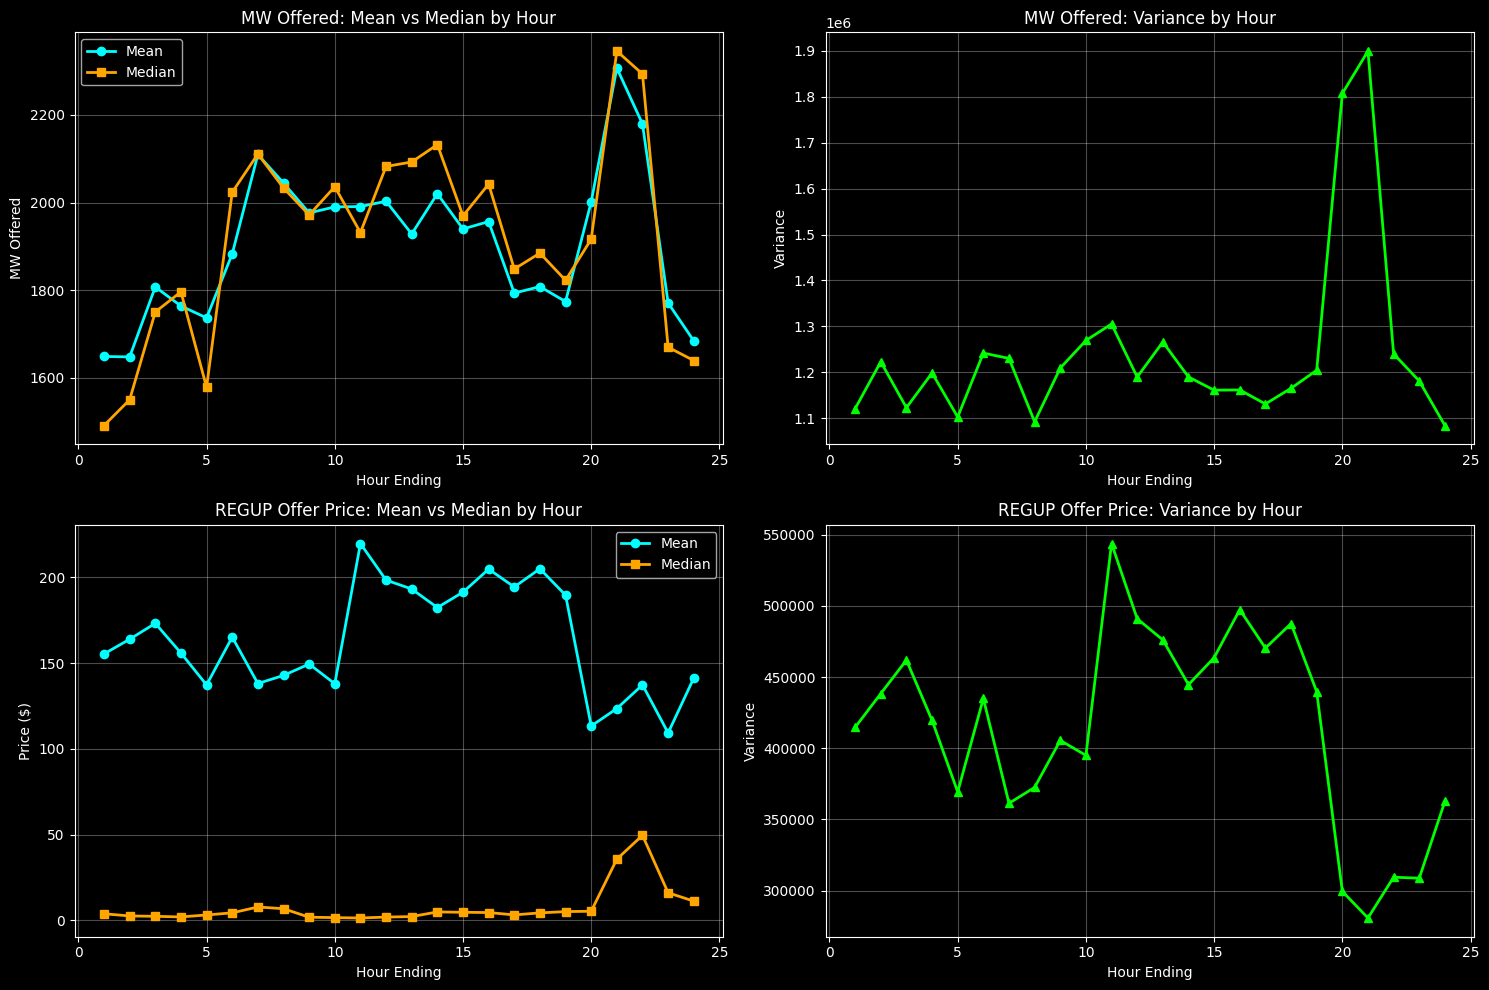

In [13]:
# Create visualizations with dark theme
plt.style.use('dark_background')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.plot(summary_df['Hour'], summary_df['MW_Mean'], 'cyan', marker='o', label='Mean', linewidth=2)
ax1.plot(summary_df['Hour'], summary_df['MW_Median'], 'orange', marker='s', label='Median', linewidth=2)
ax1.set_xlabel('Hour Ending')
ax1.set_ylabel('MW Offered')
ax1.set_title('MW Offered: Mean vs Median by Hour')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(summary_df['Hour'], summary_df['MW_Var'], 'lime', marker='^', linewidth=2)
ax2.set_xlabel('Hour Ending')
ax2.set_ylabel('Variance')
ax2.set_title('MW Offered: Variance by Hour')
ax2.grid(True, alpha=0.3)

ax3.plot(summary_df['Hour'], summary_df['Price_Mean'], 'cyan', marker='o', label='Mean', linewidth=2)
ax3.plot(summary_df['Hour'], summary_df['Price_Median'], 'orange', marker='s', label='Median', linewidth=2)
ax3.set_xlabel('Hour Ending')
ax3.set_ylabel('Price ($)')
ax3.set_title('REGUP Offer Price: Mean vs Median by Hour')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.plot(summary_df['Hour'], summary_df['Price_Var'], 'lime', marker='^', linewidth=2)
ax4.set_xlabel('Hour Ending')
ax4.set_ylabel('Variance')
ax4.set_title('REGUP Offer Price: Variance by Hour')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

OK, now let's see if there's any correlation between MW Offered and the REGUP Offer Price we can use to predict an offer price, given the MW offered, and hour of the day.

Pearson correlation coefficient: 0.4473


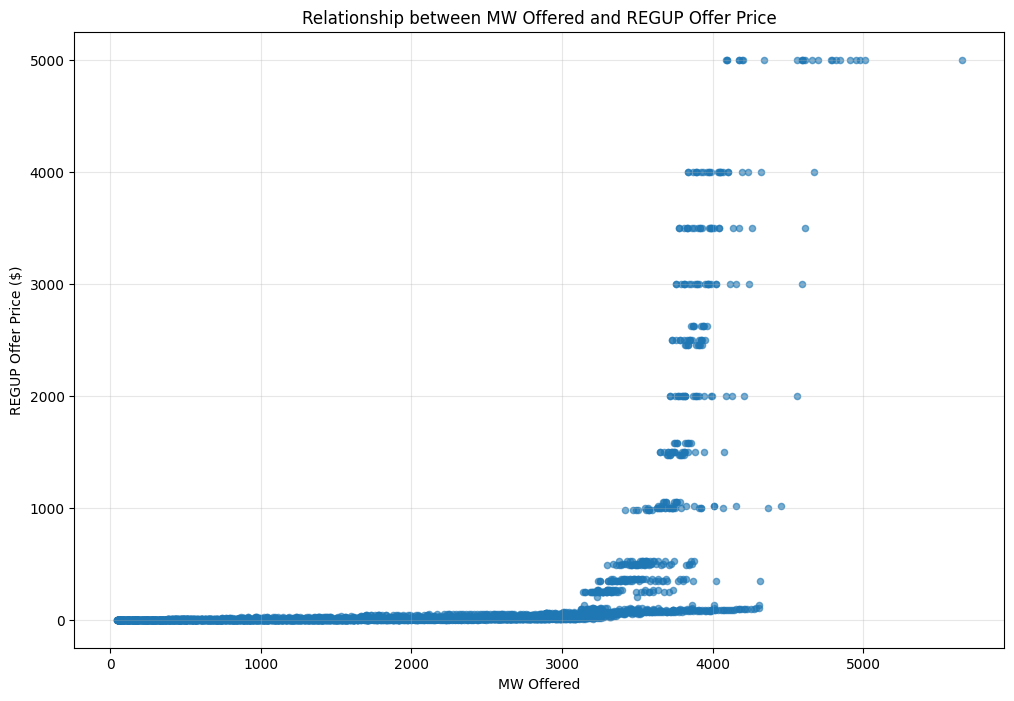

In [7]:
# Correlation analysis
correlation = df['MW Offered'].corr(df['REGUP Offer Price'])
print(f"Pearson correlation coefficient: {correlation:.4f}")

plt.figure(figsize=(12, 8))
plt.scatter(df['MW Offered'], df['REGUP Offer Price'], alpha=0.6, s=20)
plt.xlabel('MW Offered')
plt.ylabel('REGUP Offer Price ($)')
plt.title('Relationship between MW Offered and REGUP Offer Price')
plt.grid(True, alpha=0.3)
plt.show()


Original dataset size: 4533
Non-zero price dataset size: 4509

Correlation coefficients for different transformations:
--------------------------------------------------
Log(Price)               : 0.8701
Log(MW) vs Log(Price)    : 0.7495
MW³                      : 0.6658
Sqrt(Price)              : 0.6105
MW²                      : 0.5748
Sqrt(MW) vs Sqrt(Price)  : 0.5236
Original                 : 0.4473
Sqrt(MW)                 : 0.3664
Log(MW)                  : 0.2778
MW vs 1/Price            : -0.2032
1/MW                     : -0.1066


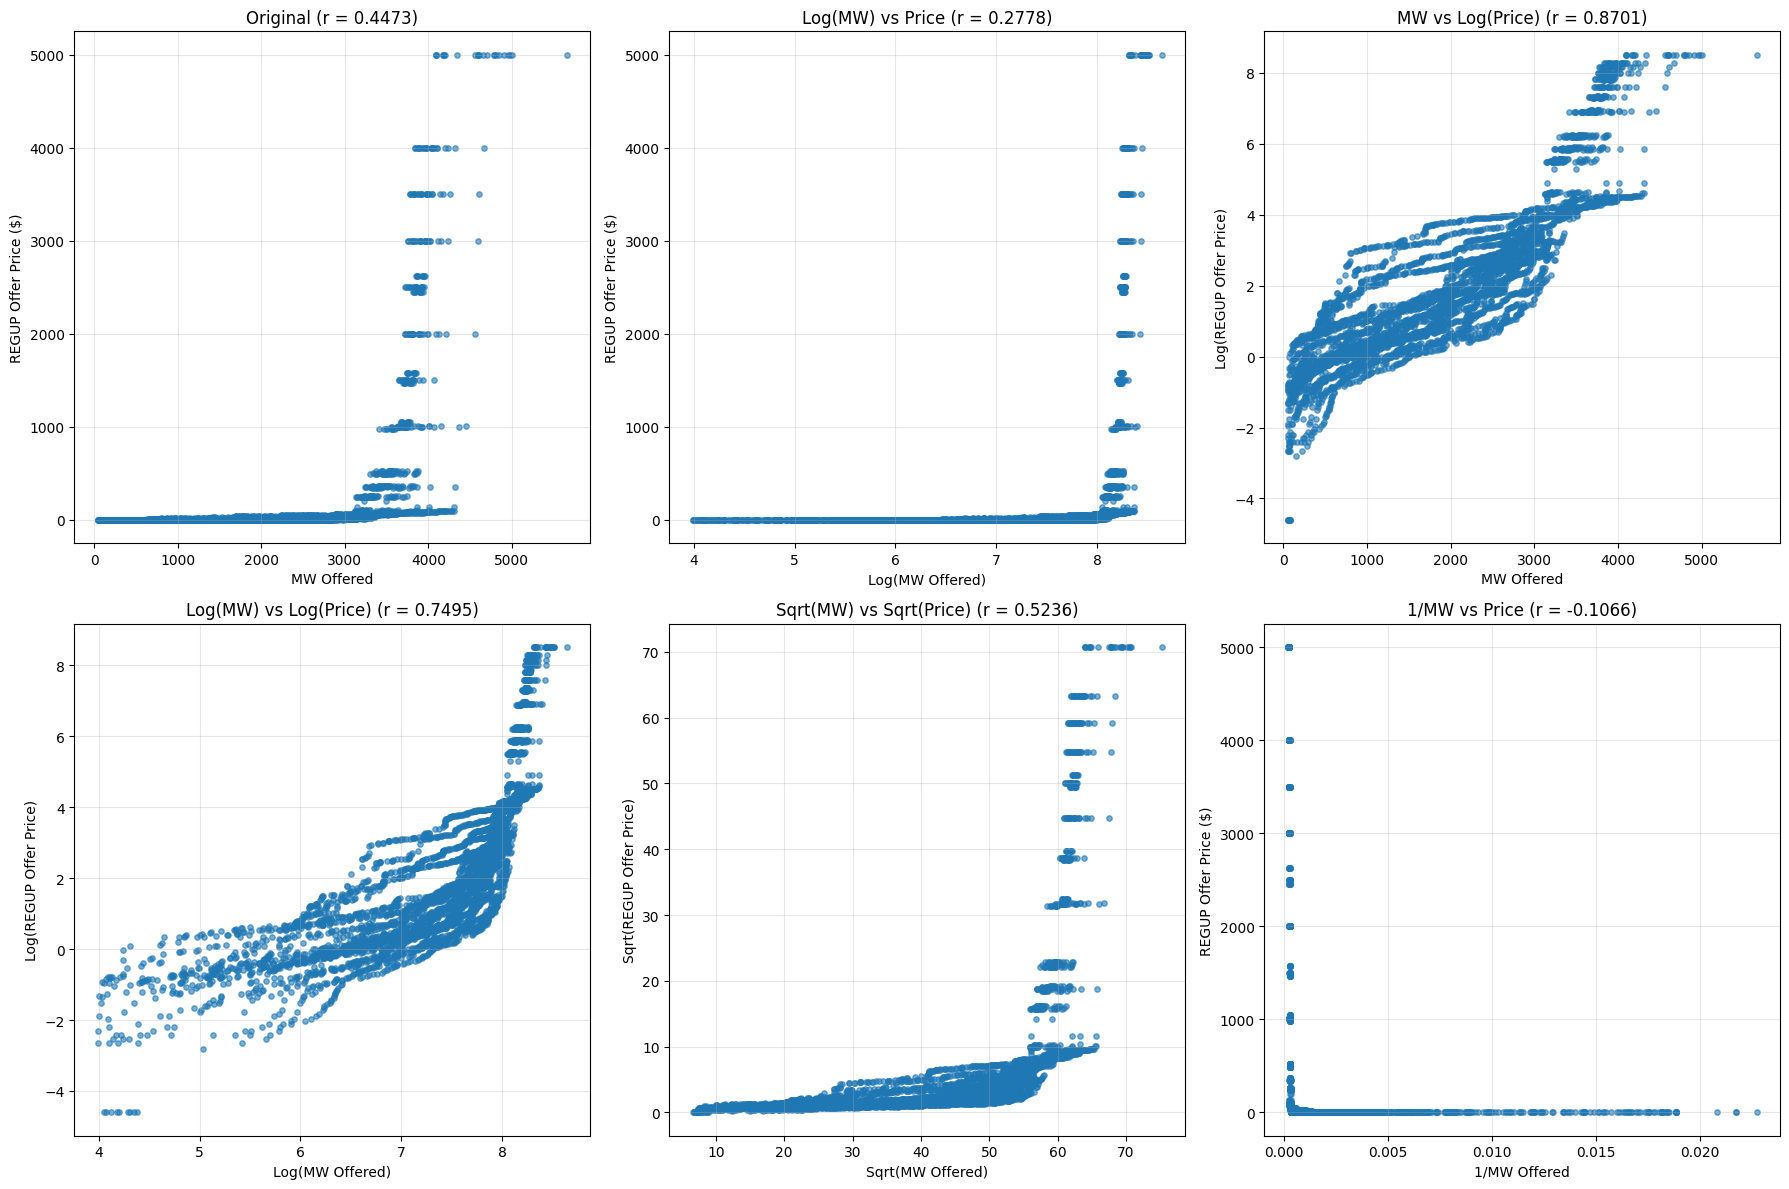

In [8]:
# Explore different transformations to linearize the relationship

# Remove zero values for logarithmic transformations
df_nonzero = df[df['REGUP Offer Price'] > 0].copy()
print(f"Original dataset size: {len(df)}")
print(f"Non-zero price dataset size: {len(df_nonzero)}")

# Calculate correlations for different transformations
transformations = {}

transformations['Original'] = df['MW Offered'].corr(df['REGUP Offer Price'])

# Log transformations (only on non-zero prices)
transformations['Log(Price)'] = df_nonzero['MW Offered'].corr(np.log(df_nonzero['REGUP Offer Price']))
transformations['Log(MW)'] = np.log(df_nonzero['MW Offered']).corr(df_nonzero['REGUP Offer Price'])
transformations['Log(MW) vs Log(Price)'] = np.log(df_nonzero['MW Offered']).corr(np.log(df_nonzero['REGUP Offer Price']))

# Square root transformations
transformations['Sqrt(Price)'] = df['MW Offered'].corr(np.sqrt(df['REGUP Offer Price']))
transformations['Sqrt(MW)'] = np.sqrt(df['MW Offered']).corr(df['REGUP Offer Price'])
transformations['Sqrt(MW) vs Sqrt(Price)'] = np.sqrt(df['MW Offered']).corr(np.sqrt(df['REGUP Offer Price']))

# Reciprocal transformations
transformations['1/MW'] = (1/df['MW Offered']).corr(df['REGUP Offer Price'])
transformations['MW vs 1/Price'] = df_nonzero['MW Offered'].corr(1/df_nonzero['REGUP Offer Price'])

# Polynomial features
transformations['MW²'] = (df['MW Offered']**2).corr(df['REGUP Offer Price'])
transformations['MW³'] = (df['MW Offered']**3).corr(df['REGUP Offer Price'])

print("\nCorrelation coefficients for different transformations:")
print("-" * 50)
for transform, corr in sorted(transformations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{transform:<25}: {corr:.4f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Original relationship
axes[0].scatter(df['MW Offered'], df['REGUP Offer Price'], alpha=0.6, s=15)
axes[0].set_xlabel('MW Offered')
axes[0].set_ylabel('REGUP Offer Price ($)')
axes[0].set_title(f'Original (r = {transformations["Original"]:.4f})')
axes[0].grid(True, alpha=0.3)

# Log(MW) vs Price
axes[1].scatter(np.log(df_nonzero['MW Offered']), df_nonzero['REGUP Offer Price'], alpha=0.6, s=15)
axes[1].set_xlabel('Log(MW Offered)')
axes[1].set_ylabel('REGUP Offer Price ($)')
axes[1].set_title(f'Log(MW) vs Price (r = {transformations["Log(MW)"]:.4f})')
axes[1].grid(True, alpha=0.3)

# MW vs Log(Price)
axes[2].scatter(df_nonzero['MW Offered'], np.log(df_nonzero['REGUP Offer Price']), alpha=0.6, s=15)
axes[2].set_xlabel('MW Offered')
axes[2].set_ylabel('Log(REGUP Offer Price)')
axes[2].set_title(f'MW vs Log(Price) (r = {transformations["Log(Price)"]:.4f})')
axes[2].grid(True, alpha=0.3)

# Log(MW) vs Log(Price)
axes[3].scatter(np.log(df_nonzero['MW Offered']), np.log(df_nonzero['REGUP Offer Price']), alpha=0.6, s=15)
axes[3].set_xlabel('Log(MW Offered)')
axes[3].set_ylabel('Log(REGUP Offer Price)')
axes[3].set_title(f'Log(MW) vs Log(Price) (r = {transformations["Log(MW) vs Log(Price)"]:.4f})')
axes[3].grid(True, alpha=0.3)

# Sqrt transformations
axes[4].scatter(np.sqrt(df['MW Offered']), np.sqrt(df['REGUP Offer Price']), alpha=0.6, s=15)
axes[4].set_xlabel('Sqrt(MW Offered)')
axes[4].set_ylabel('Sqrt(REGUP Offer Price)')
axes[4].set_title(f'Sqrt(MW) vs Sqrt(Price) (r = {transformations["Sqrt(MW) vs Sqrt(Price)"]:.4f})')
axes[4].grid(True, alpha=0.3)

# 1/MW vs Price
axes[5].scatter(1/df['MW Offered'], df['REGUP Offer Price'], alpha=0.6, s=15)
axes[5].set_xlabel('1/MW Offered')
axes[5].set_ylabel('REGUP Offer Price ($)')
axes[5].set_title(f'1/MW vs Price (r = {transformations["1/MW"]:.4f})')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Looks like MW vs the log price has the strongest correlation!  Let's see if we can build a model to predict price given this helpful information.

In [9]:
# Build a multi-variable model using MW and Hour to predict Log(Price)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("Using MW vs Log(Price) transformation with Hour as additional feature")

# Prepare data (using non-zero prices for log transformation)
df_model = df_nonzero.copy()

# Features: MW Offered and Hour Ending
X = df_model[['MW Offered', 'Hour Ending']].values
y = np.log(df_model['REGUP Offer Price']).values  # Log transform the target


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Using MW vs Log(Price) transformation with Hour as additional feature
Training set: 3607 samples
Test set: 902 samples


After some testing, I found that a Random Forest model seems to give very good performance for offer price predictions:

In [10]:
# Build Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Convert predictions back to original price scale
y_pred_rf_original = np.exp(y_pred_rf)
y_test_original = np.exp(y_test)

# Calculate metrics
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Calculate metrics on original scale
rf_r2_orig = r2_score(y_test_original, y_pred_rf_original)
rf_mse_orig = mean_squared_error(y_test_original, y_pred_rf_original)
rf_mae_orig = mean_absolute_error(y_test_original, y_pred_rf_original)

print(f"Results on Log Scale:")
print(f"  R² Score: {rf_r2:.4f}")
print(f"  MSE: {rf_mse:.4f}")
print(f"  MAE: {rf_mae:.4f}")
print(f"Results on Original Scale:")
print(f"  R² Score: {rf_r2_orig:.4f}")
print(f"  MSE: {rf_mse_orig:.4f}")
print(f"  MAE: ${rf_mae_orig:.2f}")

# Feature importance
feature_importance = rf_model.feature_importances_
print(f"\nFeature Importance:")
print(f"  MW Offered: {feature_importance[0]:.4f}")
print(f"  Hour Ending: {feature_importance[1]:.4f}")

Results on Log Scale:
  R² Score: 0.9921
  MSE: 0.0379
  MAE: 0.0771
Results on Original Scale:
  R² Score: 0.9657
  MSE: 15025.9765
  MAE: $23.73

Feature Importance:
  MW Offered: 0.8621
  Hour Ending: 0.1379


In [11]:
# Test predictions against actual values from the dataframe
def predict_regup_price(mw_offered, hour_ending):
    """
    Predict REGUP offer price based on MW offered and hour using Random Forest model
    """
    input_data = np.array([[mw_offered, hour_ending]])
    log_price = rf_model.predict(input_data)[0]
    return np.exp(log_price)  # Convert back to original scale

def find_actual_value(mw_target, hour_target, tolerance=0.1):
    """
    Find the actual offer price for a specific MW and hour combination
    Returns the first match found within tolerance
    """
    # Look for exact matches first
    exact_match = df_model[
        (df_model['MW Offered'] == mw_target) &
        (df_model['Hour Ending'] == hour_target)
    ]

    if len(exact_match) > 0:
        return exact_match['REGUP Offer Price'].iloc[0]

    # If no exact match, look for closest match within tolerance
    close_match = df_model[
        (np.abs(df_model['MW Offered'] - mw_target) <= tolerance) &
        (df_model['Hour Ending'] == hour_target)
    ]

    if len(close_match) > 0:
        # Return the closest match
        closest_idx = np.abs(close_match['MW Offered'] - mw_target).idxmin()
        return close_match.loc[closest_idx, 'REGUP Offer Price']

    return np.nan

test_scenarios = [
    (70, 12),      # 70 MW @ 12
    (101.3, 6),    # 101.3 MW @ 6
    (201, 7),      # 201 MW @ 7
    (500.3, 15),   # 500.3 MW @ 15
    (1015.3, 18),  # 1015.3 MW @ 18
    (2001.6, 19),  # 2001.6 MW @ 19
    (3000.4, 22),  # 3000.4 MW @ 22
    (4007.2, 22),  # 4007.2 MW @ 22
    (5654.6, 21)   # 5654.6 MW @ 21
]

print("=== Prediction Testing Against Test Scenarios ===")
print("MW Offered | Hour | Random Forest | Actual Value | Error | Error %")
print("-" * 70)

for mw, hour in test_scenarios:
    rf_pred = predict_regup_price(mw, hour)
    actual_value = find_actual_value(mw, hour)

    if not np.isnan(actual_value):
        error = abs(rf_pred - actual_value)
        error_pct = (error / actual_value) * 100
        print(f"{mw:8.1f}   | {hour:2d}   | ${rf_pred:9.2f}   | ${actual_value:10.2f}   | ${error:5.2f} | {error_pct:6.1f}%")
    else:
        print(f"{mw:8.1f}   | {hour:2d}   | ${rf_pred:9.2f}   | {'Not Found':>10s}   | {'N/A':>5s} | {'N/A':>6s}")



=== Prediction Testing Against Test Scenarios ===
MW Offered | Hour | Random Forest | Actual Value | Error | Error %
----------------------------------------------------------------------
    70.0   | 12   | $     0.16   | $      0.17   | $ 0.01 |    3.1%
   101.3   |  6   | $     0.58   | $      0.69   | $ 0.11 |   16.5%
   201.0   |  7   | $     0.64   | $      0.60   | $ 0.04 |    6.8%
   500.3   | 15   | $     1.00   | $      1.01   | $ 0.01 |    0.7%
  1015.3   | 18   | $     2.04   | $      2.04   | $ 0.00 |    0.0%
  2001.6   | 19   | $    10.37   | $     10.85   | $ 0.48 |    4.4%
  3000.4   | 22   | $    64.43   | $     64.31   | $ 0.12 |    0.2%
  4007.2   | 22   | $   665.58   | $   1013.00   | $347.42 |   34.3%
  5654.6   | 21   | $  4550.02   | $   5000.00   | $449.98 |    9.0%


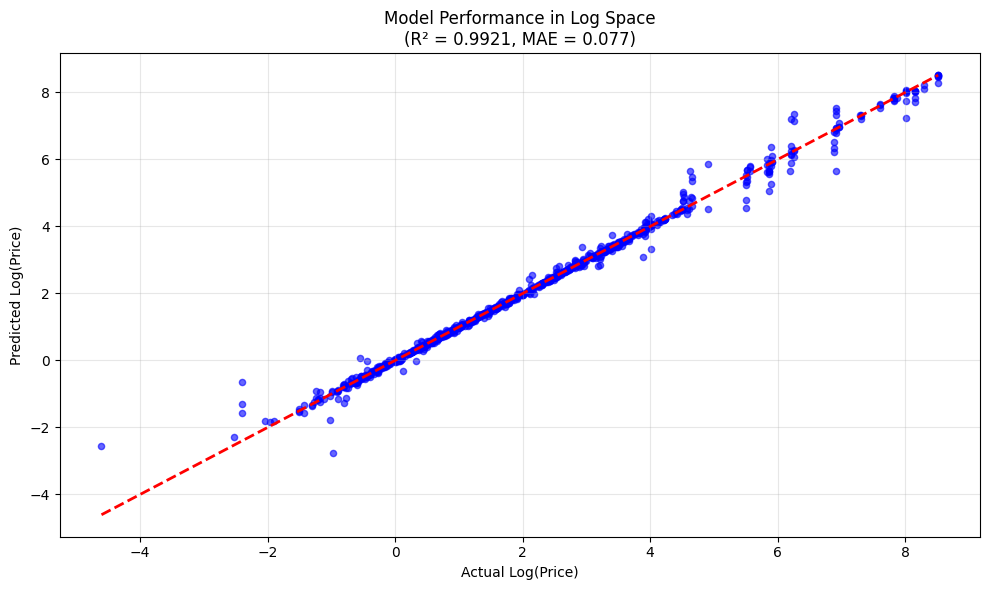

In [12]:
plt.figure(figsize=(10, 6))

# Log scale performance (the "true" performance)
plt.scatter(y_test, y_pred_rf, alpha=0.6, s=20, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.title(f'Model Performance in Log Space\n(R² = {rf_r2:.4f}, MAE = {rf_mae:.3f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Seems like the model performance is pretty close, with some outliers.  It seems in general, the higher the offer price, the less accurate the prediction model will be. This was only a small sample of data taken from one day, so for a more serious study, it would probably make sense to sample several different days throughout the year.  This should help to avoid overfitting, as well. Since this model was trained on a small example of data, the performance would likely not be as good if it were tested on a different day of data.  I also did this analysis very quickly and I'm not sure if I used the log transformation correctly, so I'd like to better learn how to use it in the future.